# Python  TASK 1
## Name- Jatin Karthik
## Matriculation no.-313301

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 200000

Reading the dataset from and looking at few of its content

In [2]:
store=pd.read_csv('D:\\Hildesheim Universitaet\\Semester 1\\ML LAB\\Excercise_2\\rossmann-store-sales\\store.csv')
#store.head()
sales=pd.read_csv('D:\\Hildesheim Universitaet\\Semester 1\\ML LAB\\Excercise_2\\rossmann-store-sales\\train.csv', low_memory=False )
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


PART A

**1) Find the store that has the maximum sale recorded. Print the store id, date and the sales on that day**

In [3]:
A=sales["Sales"]  #(i)
max=A.idxmax()
max_sales=A.max()
print("The maximum sales are",max_sales)
L=sales.iloc[max]
print("The Date this maximum sale was recorded was",L['Date'])
print("The store ID is",L['Store'])

The maximum sales are 41551
The Date this maximum sale was recorded was 2015-06-22
The store ID is 909


**2) Find the store(s) that has/ve the least possible and maximum possible competition distance(s).**

In [4]:
C=store["CompetitionDistance"] #(ii)
Cd_max=C.idxmax()
Cd_min=C.idxmin()
Cd_max_store=store.iloc[Cd_max]
Cd_min_store=store.iloc[Cd_min]
print('the store which has max competition distance',Cd_max_store['Store'])
print('the store which has max competition distance',Cd_min_store['Store'])
#C.idxmin()

the store which has max competition distance 453
the store which has max competition distance 516


**3)What has been the maximum timeline a store has ran a "Promo" for? Which store was that, and what
dates did the promotion covered?**

In my opinion the question can be understood in two different ways:-What has been the maximum timeline a store has ran a "Promo" for? Which store was that, and what
dates did the promotion covered?. 
First case-Where I have displayed only with respect to one single year and looked for stores whihc had the maximum sales and most promo months.

Second case- I have implemented by taking in Year also into  consideration and looked for the olddest promo running store. Thus, displayed all its details.

In [5]:
X=store.iloc[store["Promo2SinceWeek"].idxmax()] #(iii)
print(X['Store'])
print(X['PromoInterval'])   

437
Jan,Apr,Jul,Oct


In [27]:
print("This list shows the stores which have been running a Promo since the most oldest year in dataset") #(iii)
store.sort_values(by=["Promo2SinceYear", "Promo2SinceWeek"],ascending=[True,True])[["Promo2SinceYear", "Promo2SinceWeek"]]
Z=store[(store["Promo2SinceYear"]==2009) & (store["Promo2SinceWeek"]==31)]
Z[["Store","Promo2SinceWeek","Promo2SinceYear"]]

This list shows the stores which have been running a Promo since the most oldest year in dataset


,Store,Promo2SinceWeek,Promo2SinceYear
157,158,31.0,2009.0
276,277,31.0,2009.0
369,370,31.0,2009.0
611,612,31.0,2009.0
636,637,31.0,2009.0
807,808,31.0,2009.0
959,960,31.0,2009.0


**4)What is the difference in the mean of sales (across all stores) when offering a Promo and not?**

In [7]:
#P=sales["Promo"]  #(iv)

M1=sales[(sales["Promo"])== 1]
M1=M1["Sales"].mean()
M2=sales[(sales["Promo"])== 0]
M2=M2["Sales"].mean()
print("The difference in the mean of sales is", M1-M2)

The difference in the mean of sales is 3585.1012408091174


**5)Are there any anomalies in the data as in where the store was "Open" but had no sales recorded? or
vice versa?**

In [8]:
anamoly_type1=0 #(X)  (v)
anamoly_type2=0 #Y
S=sales["Sales"]
O=sales["Open"]

X=sales[(sales["Open"]== 1) & (sales["Sales"]==0)]
#X
print("The number of stores for which it was Open but no sales was recorded",len(X))
Y=sales[(sales["Open"]== 0) & (sales["Sales"]>0)]
#Y
print("The number of stores for which it was closed but sales was recorded",len(Y))

print("Therefore, Yes such anamolies exist")

The number of stores for which it was Open but no sales was recorded 54
The number of stores for which it was closed but sales was recorded 0
Therefore, Yes such anamolies exist


**6)Which store type (’a’,’b’ etc.) has had the most sales?**

In [9]:

merged=store.merge(sales, on='Store') #(vi)
#merged
Type=merged.iloc[merged["Sales"].idxmax()]['StoreType']
print("The store type of the store with maximum sales is '",Type,"'")

The store type of the store with maximum sales is ' a '


PART B

**1)• On a monthly basis how do the mean of sales vary (across all stores)? plot these sale**

Text(0, 0.5, 'Mean')

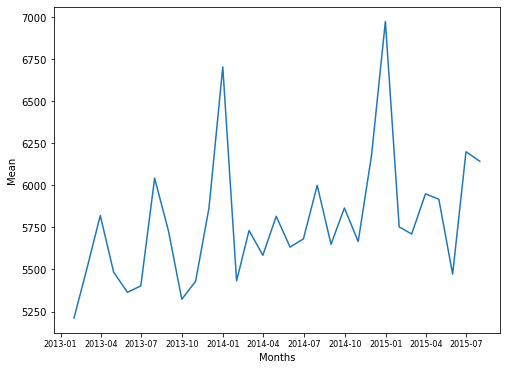

In [10]:
#mean=[]   (2i)
sales.Date = pd.to_datetime(sales.Date)
Mean_by_month=sales.groupby(pd.Grouper(key='Date', freq='M'))["Sales"].mean()
#sales.groupby(sales['Date'])

#plt.plot(Mean_by_month.index,Mean_by_month.values)
fig = plt.figure(figsize=(8, 6))
plt.plot(Mean_by_month.index,Mean_by_month.values)
#fig.title('Month wise mean')
plt.xticks(fontsize=8)
plt.xlabel('Months')
plt.ylabel('Mean')

<BarContainer object of 942 artists>

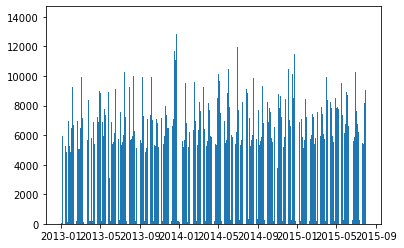

In [29]:
Mean_by_mon=sales.groupby(["Date"])["Sales"].mean()
plt.bar(sorted(sales["Date"].unique()),Mean_by_mon.values)

**2)On a daily basis how do the mean of sales vary (across all stores)? again, plot these sales.**
Here, the question could be understood in ways wherein the sales on specific days of the week chart can be plotted and so can mean for everyday of the whole dataset. I have plotted both

Text(0, 0.5, 'Mean')

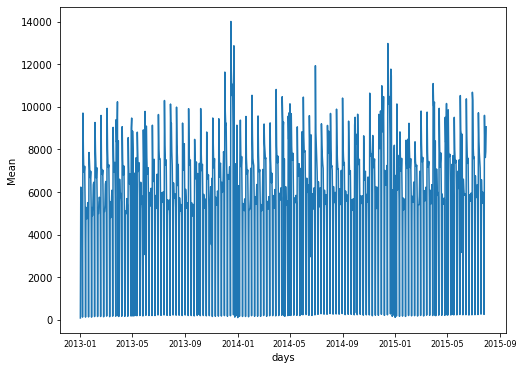

In [31]:
Mean_by_day=sales.groupby(pd.Grouper(key='Date', freq='D'))["Sales"].mean() #(2ii)


#plt.plot(Mean_by_month.index,Mean_by_month.values)
fig = plt.figure(figsize=(8, 6))
plt.plot(Mean_by_day.index,Mean_by_day.values)
#fig.title('Month wise mean')
plt.xticks(fontsize=8)
plt.xlabel('days')
plt.ylabel('Mean')

<BarContainer object of 7 artists>

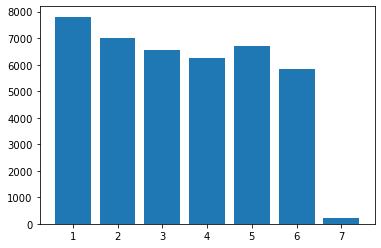

In [22]:
#graph day wise
Mean_by_d=sales.groupby(["DayOfWeek"])["Sales"].mean()
plt.bar(sorted(sales["DayOfWeek"].unique()),Mean_by_d.values)

**3)For the first store id, plot it’s cumulative sales for the first year**

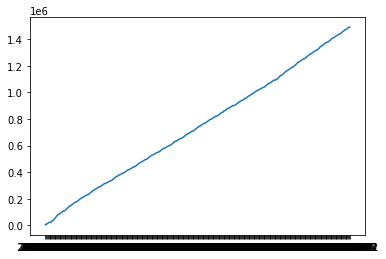

In [101]:


filtered = sales.loc[(sales['Date'] >= '2013-01-01') & (sales['Date'] < '2014-01-01')] #2iii
                     
filtered_sid=filtered[filtered["Store"]==1]
Y=filtered_sid["Sales"].cumsum()
plt.plot(filtered_sid["Date"],Y)


**4) Plot and comment on the following relationships:
– customers(x-axis) vs. sales(y-axis)
– competitiondistance(x-axis) vs. sales(y-axis)**

           Date
0    2015-07-31
1    2015-07-30
2    2015-07-29
3    2015-07-28
4    2015-07-27
..          ...
937  2013-01-05
938  2013-01-04
939  2013-01-03
940  2013-01-02
941  2013-01-01

[942 rows x 1 columns]


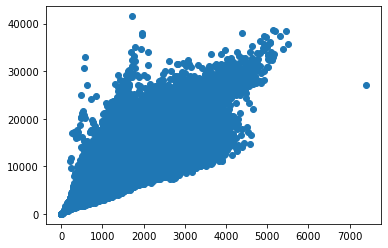

In [96]:
plt.scatter(sales['Customers'],sales['Sales'])  #2iv merge and check it out
df2 = pd.DataFrame({'Date':sales.Date.unique()})
df3= pd.DataFrame({'Store':sales.Store.unique()})
print(df2)


Comment--A very general opinion can be that the higher the customers, the higher the sales.

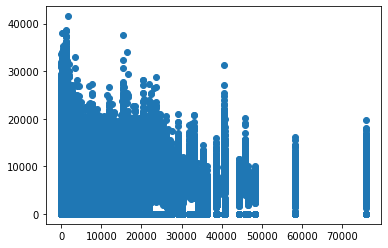

In [95]:
m=pd.merge(sales,store,on='Store')
#m=df2[['Date']].merge(sales[['Store','Sales','Date']], on='Date')
#m
plt.scatter(m['CompetitionDistance'],m['Sales'])

Comment on relationship--The sales are higher around the corner where the competition distance is the least.

**5)Plot an array of Pearson correlations between all features. Remember to do the merge operation
between the dataframes store and train.**

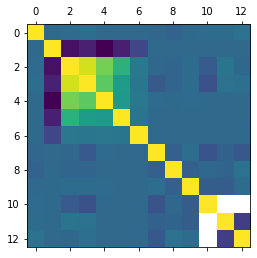

In [89]:
result = pd.merge(sales, store, on="Store") #2v
result.corr(method='pearson')
plt.matshow(result.corr())  #make seaborn

**6)For the first 10 stores (id’ed) draw boxplots of their sales
• From the above plot, which store has the highest median sales?**

4th store has the highest median sale


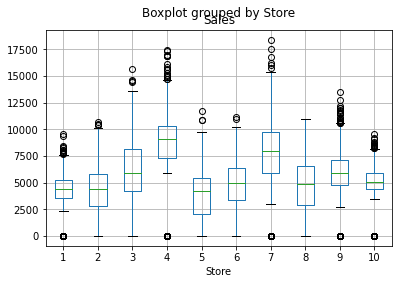

In [79]:
 #2vi
stores_10=sales.loc[sales.Store<11,['Store','Sales']]
stores_10.boxplot(column='Sales',by='Store')
print("4th store has the highest median sale")
